In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb # XGBoost stuff
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from ReliefF import ReliefF

In [2]:
root = "../../../"

In [3]:
df = pd.read_csv(root + "datasets/multiclass/processed/CICDDoS_corr.csv", index_col=[0])

In [4]:
X = df.drop(columns=[' Label'])
y = df[' Label']

In [5]:
clf_xgb_gain = xgb.XGBClassifier(objective='multi:softmax', num_classes=13, seed=42)
# clf_xgb.fit(X_train, 
#             y_train,
#             verbose=True,
#             ## the next three arguments set up early stopping.
#             early_stopping_rounds=5,
#             eval_metric='mlogloss',
#             eval_set=[(X_test, y_test)])
clf_xgb_gain.fit(X, y)

C:\Users\pedro\miniconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[23:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_classes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metri

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_classes=13, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [6]:
anova = f_classif(X, y)[0]

mi = mutual_info_classif(X, y)

relieff = ReliefF(n_neighbors=20, n_features_to_keep=20)
relieff.fit(X.to_numpy(),y.to_numpy())
relief = relieff.feature_scores

xgb_gain = clf_xgb_gain.feature_importances_

In [7]:
feature_df = pd.DataFrame(columns=["anova", "mi", "relief", "xgb_gain"])
feature_df["anova"] = anova
feature_df["mi"] = mi
feature_df["relief"] = relief
feature_df["xgb_gain"] = xgb_gain
feature_df.index = X.columns

In [8]:
for method in feature_df.columns:
    feature_df[method + '_rank'] = feature_df[method].rank(method='first')

ranks = [column for column in feature_df.columns if 'rank' in column]
feature_df['wrfs'] = feature_df[ranks].sum(axis=1)
feature_df.sort_values(by='wrfs', ascending=False, inplace=True)

In [9]:
feature_df

,anova,mi,relief,xgb_gain,anova_rank,mi_rank,relief_rank,xgb_gain_rank,wrfs
Max Packet Length,1469.370431,1.767826,28866.0,0.016258,36.0,38.0,38.0,29.0,141.0
Fwd Packet Length Min,5286.424153,1.744144,23860.0,0.029583,38.0,37.0,34.0,31.0,140.0
ACK Flag Count,2814.160582,0.381709,24714.0,0.173538,37.0,26.0,37.0,37.0,137.0
Total Fwd Packets,364.409051,0.454713,19336.0,0.136534,33.0,29.0,22.0,35.0,119.0
Init_Win_bytes_forward,143.736240,0.525065,21476.0,0.007453,27.0,30.0,30.0,25.0,112.0
URG Flag Count,338.946336,0.106079,24202.0,0.156974,32.0,8.0,36.0,36.0,112.0
Fwd Packet Length Std,43.787109,0.273692,21836.0,0.098623,19.0,24.0,31.0,34.0,108.0
Flow Bytes/s,598.328252,1.582052,5506.0,0.003012,35.0,36.0,4.0,21.0,96.0
Fwd Packets/s,204.655442,0.786197,4220.0,0.007026,30.0,35.0,3.0,24.0,92.0
Down/Up Ratio,337.305549,0.170967,21924.0,0.000996,31.0,16.0,32.0,12.0,91.0


In [10]:
feature_df['wrfs']

 Max Packet Length              141.0
 Fwd Packet Length Min          140.0
 ACK Flag Count                 137.0
 Total Fwd Packets              119.0
Init_Win_bytes_forward          112.0
 URG Flag Count                 112.0
 Fwd Packet Length Std          108.0
Flow Bytes/s                     96.0
Fwd Packets/s                    92.0
 Down/Up Ratio                   91.0
Subflow Fwd Packets              89.0
 Flow Packets/s                  88.0
 Packet Length Variance          88.0
Fwd IAT Total                    80.0
 Flow IAT Min                    78.0
 Total Backward Packets          74.0
 Bwd Packets/s                   74.0
 Flow IAT Std                    73.0
 Bwd Packet Length Min           73.0
 Bwd Header Length               71.0
 Subflow Bwd Packets             70.0
 Total Length of Bwd Packets     68.0
 Init_Win_bytes_backward         66.0
 Fwd IAT Max                     66.0
 Active Std                      65.0
 CWE Flag Count                  64.0
 Idle Min   

Text(0, 0.5, 'WRFS')

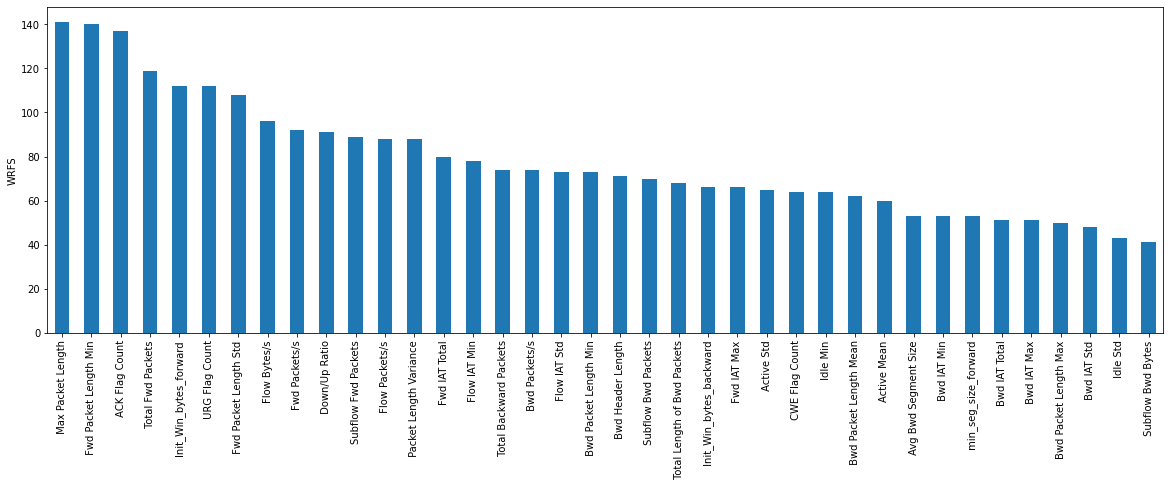

In [11]:
feature_df['wrfs'].plot.bar(figsize=(20, 6))
plt.ylabel('WRFS')

In [12]:
features_to_keep = feature_df.index[:20]
features_to_keep

Index([' Max Packet Length', ' Fwd Packet Length Min', ' ACK Flag Count',
       ' Total Fwd Packets', 'Init_Win_bytes_forward', ' URG Flag Count',
       ' Fwd Packet Length Std', 'Flow Bytes/s', 'Fwd Packets/s',
       ' Down/Up Ratio', 'Subflow Fwd Packets', ' Flow Packets/s',
       ' Packet Length Variance', 'Fwd IAT Total', ' Flow IAT Min',
       ' Total Backward Packets', ' Bwd Packets/s', ' Flow IAT Std',
       ' Bwd Packet Length Min', ' Bwd Header Length'],
      dtype='object')

In [13]:
# to remove the rest of the features:
X = X[features_to_keep]

In [14]:
X.shape

(5280, 20)